In [65]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters

## Fonctions

In [66]:
def e_greedy(state, epsilon, q, env):
    exp_exp_tradeoff = random.uniform(0, 1)
    if exp_exp_tradeoff > epsilon:
        return np.argmax(q[state, :])
    return env.action_space.sample()


def maj_q(q_local, state, action, new_state, reward, learning_rate, gamma):
    q_init = q_local[state, action]
    max_state = np.max(q_local[new_state, :])
    q_local[state, action] = (1 - learning_rate) * q_init + learning_rate * (reward + gamma * max_state)
    return q_local

def is_fractile(episode_actuel, episode_total):
    return episode_actuel % (episode_total/50) == 0

# Renforcement

In [67]:
def train(epsilon = 1.0, max_steps = 200, learning_rate = 0.7, gamma = 0.8, max_epsilon = 1.0, min_epsilon = 0.01, decay_rate = 0.01, total_episodes = 750, total_test_episodes = 1):
    title = "Epsilon: {}, learning_rate: {}, gamma: {} ".format(epsilon, learning_rate, gamma)
    env = gym.make("Taxi-v3", render_mode="ansi")
    env.reset()
    action_size = env.action_space.n
    state_size = env.observation_space.n
    q = np.zeros((state_size, action_size))
    rewards = []
    for i in range(0, 50):
        print('=', end= '')
    print()
    for episode in range(total_episodes):
        # print("------ EPISODE " + str(episode) + "/" + str(total_episodes) + "---------")
        if is_fractile(episode, total_episodes):
            print("\b=>", end='')
        (state) = env.reset()[0]
        count = 0
        for step in range(max_steps):
            action = e_greedy(state, epsilon, q, env)
            (new_state, reward, done, info, _) = env.step(action)
            q = maj_q(q, state, action, new_state, reward, learning_rate, gamma)
            state = new_state
            count += reward
            if done:
                rewards.append(count)
                break
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    plt.title(title)
    plt.plot(rewards, color="red")
    plt.show()
    env = gym.make("Taxi-v3", render_mode="ansi")
    env.reset()

    for episode in range(total_test_episodes):
        state = env.reset()[0]
        total_rewards = 0

        for step in range(max_steps):
            env.render()
            action = np.argmax(q[state, :])

            (new_state, reward, done, info, _) = env.step(action)

            total_rewards += reward

            if done:
                break
            state = new_state
    env.close()

==================================================>

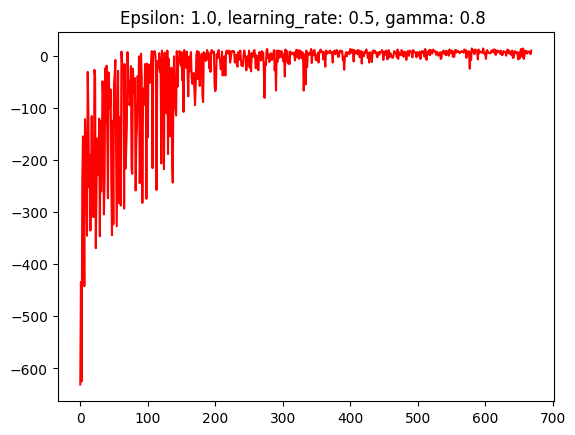

==================================================>

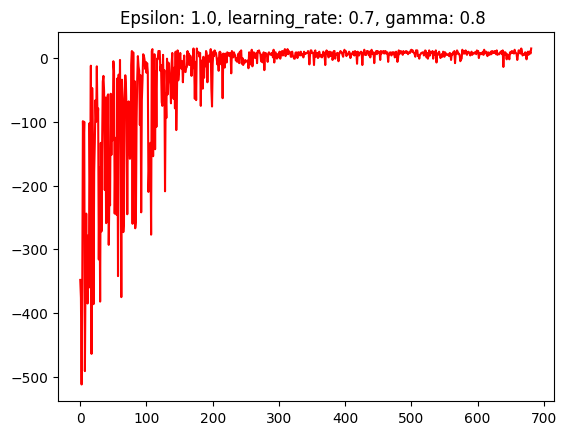

In [68]:
train(learning_rate=0.5)
train()

In [69]:
# def test_q(local_q):
#     env = gym.make("Taxi-v3", render_mode="ansi")
#     env.reset()
#
#     for episode in range(50000):
#         state = env.reset()[0]
#         done = False
#         total_rewards = 0
#
#         for step in range(max_steps):
#             env.render()
#             action = np.argmax(local_q[state, :])
#
#             (new_state, reward, done, info, _) = env.step(action)
#
#             total_rewards += reward
#
#             if done:
#                 break
#             state = new_state
#     env.close()
#     print(np.average(total_rewards))
# test_q(q)